In [1]:
# 그래프에 한글 출력하기
import sys
if 'google.colab' in sys.modules:
  !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
  # 나눔 폰트를 설치
  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  fm._rebuild()

In [2]:
import matplotlib.pyplot as plt

# 나눔바른고딕 폰트 설정
plt.rc('font', family='NanumGothic')

# 그래프의 DPI 기본값 변경
plt.rcParams['figure.dpi'] = 100

In [3]:
import gdown
gdown.download('http://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

Downloading...
From: http://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 314MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [4]:
# 하나의 figure에 여러 선 그래프 그리기
# 상위 30개 출판사 선택 후, 이에 해당하는 지 검토
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)

In [5]:
# 상위 30위에 해당하는 출판사, 발행년도, 대출건수 열만 추출
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]

In [6]:
# 출판사와 발행년도를 기준으로 행을 모은 후 대출 건수 합을 구한다.
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()
ns_book9

대출건수
출판사  발행년도      
博英社  1947     0
     1975     0
     1977     0
     1986     1
     1987     1
...         ...
황금가지 2018   200
     2019   133
     2020    98
     2021     1
     2030     2

[886 rows x 1 columns]

In [7]:
# 인덱스 초기화
ns_book9 = ns_book9.reset_index()
ns_book9

,출판사,발행년도,대출건수
0,博英社,1947,0
1,博英社,1975,0
2,博英社,1977,0
3,博英社,1986,1
4,博英社,1987,1
...,...,...,...
881,황금가지,2018,200
882,황금가지,2019,133
883,황금가지,2020,98
884,황금가지,2021,1


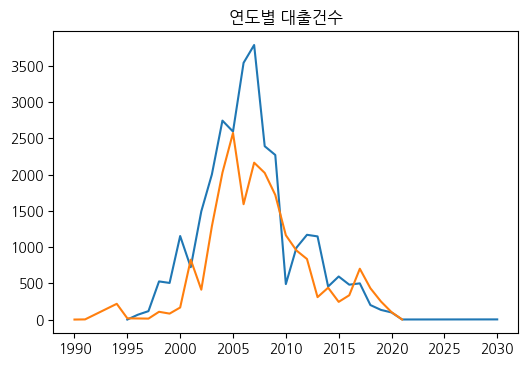

In [8]:
# 선 그래프 2개 그리기 (황금가지, 비룡소)
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

fig, ax = plt.subplots()
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('연도별 대출건수')
fig.show()

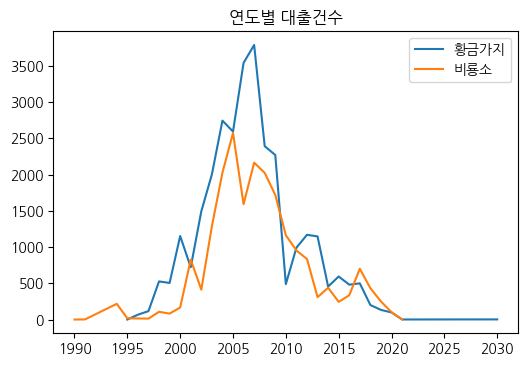

In [9]:
# 범례 추가
fig, ax = plt.subplots()
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

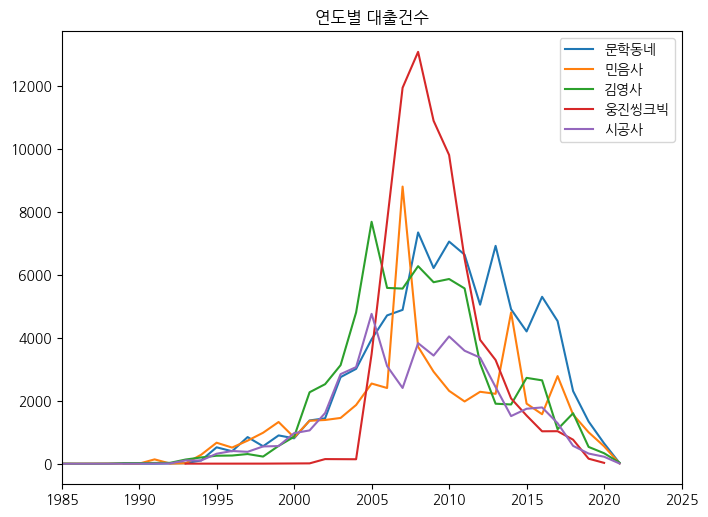

In [10]:
# 선 그래프 5개 그리기
fig, ax = plt.subplots(figsize=(8,6))

for pub in top30_pubs.index[:5]:
  line = ns_book9[ns_book9['출판사'] == pub]
  ax.plot(line['발행년도'], line['대출건수'], label=pub)

ax.set_title('연도별 대출건수')
ax.set_xlim(1985, 2025)
ax.legend()
fig.show()

In [11]:
# 스택 영역 그래프 그리기
# y 축에 넣을 2차원 배열 생성
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [12]:
# 발행년도 열을 리스트 형태로 바꾸기
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)

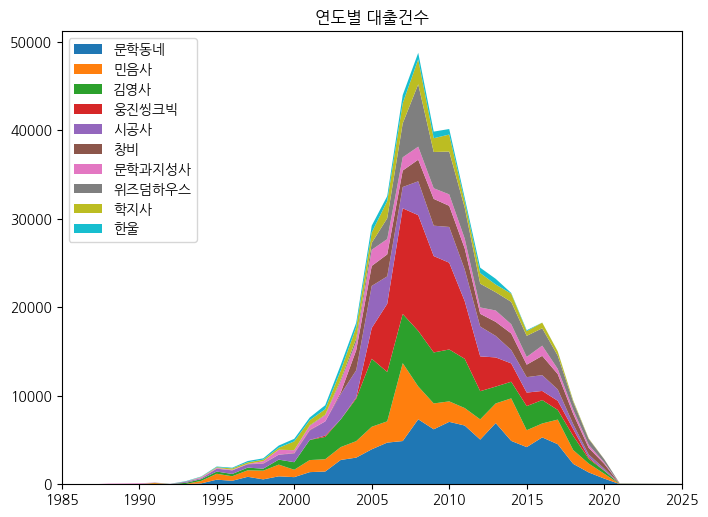

In [13]:
# stackplot() 메서드로 스택 영역 그래프 그리기
fig, ax = plt.subplots(figsize=(8,6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

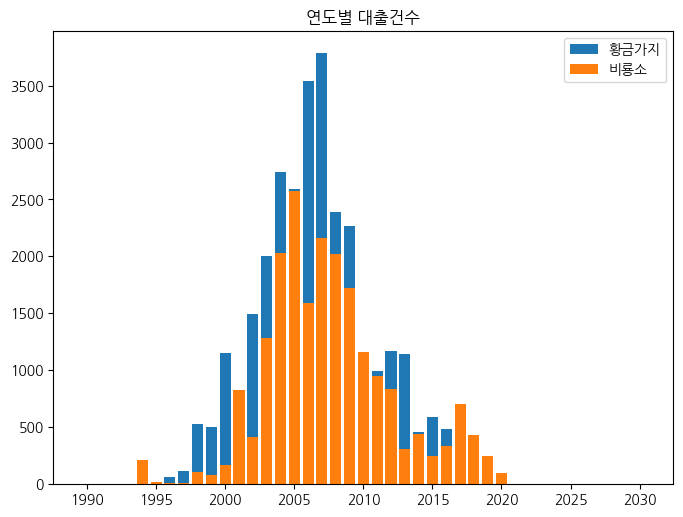

In [14]:
# 여러 개의 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.bar(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

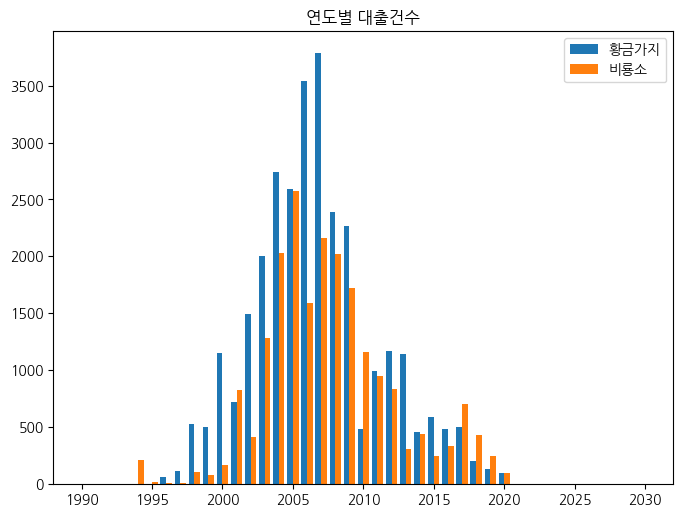

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지')
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

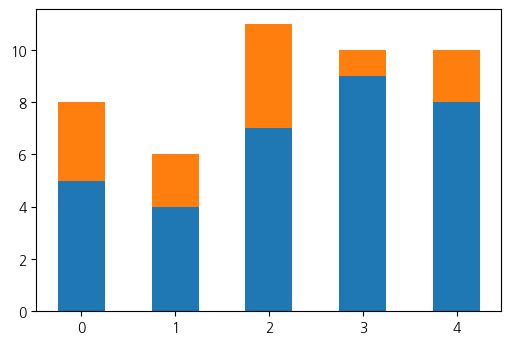

In [16]:
# 스택 막대 그래프 그리기(bottom 매개변수 이용)
height1 = [5,4,7,9,8]
height2 = [3,2,4,1,2]

plt.bar(range(5), height1, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5)
plt.show()

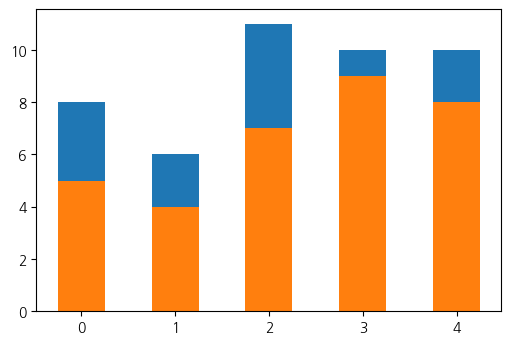

In [17]:
# 막대의 길이를 누적해놓고 이 값으로 막대 그래프를 그리기
height3 = [a+b for a,b in zip(height1, height2)]

plt.bar(range(5), height3, width=0.5)
plt.bar(range(5), height1, width=0.5)
plt.show()

In [18]:
# 데이터 값 누적하여 그리기
# 상위 5개의 출판사의 2013-2020년 대출건수 확인
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수', 2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [19]:
# 동일한 데이터프레임에서 cumsum() 메서드 호출
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수',2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [20]:
# 데이터 프레임 전체에 cumsum() 메서드 활용
ns_book12 = ns_book10.loc[top10_pubs].cumsum()
ns_book12

대출건수                                                ...           \
발행년도   1947 1974 1975 1976 1977 1978 1979 1980  1981 1982  ...     2013   
문학동네    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   6919.0   
민음사     NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   9138.0   
김영사     NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   0.0  0.0  ...  11043.0   
웅진씽크빅   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  14336.0   
시공사     NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN   NaN  NaN  ...  16769.0   
창비      NaN  NaN  NaN  0.0  0.0  2.0  NaN  NaN   NaN  1.0  ...  18356.0   
문학과지성사  NaN  NaN  NaN  NaN  1.0  NaN  7.0  NaN  20.0  NaN  ...  19641.0   
위즈덤하우스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  21702.0   
학지사     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  22574.0   
한울      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  23220.0   

                                                                                
발행년도       2014     2015     2016     2017    2018    2019    2020   2021 2030  
문학동네     4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0   18.0  NaN  
민음사      9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0   25.0  NaN  
김영사     11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0   55.0  NaN  
웅진씽크빅   13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0    NaN  NaN  
시공사     15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0   60.0  NaN  
창비      17046.0  13519.0  14515.0  12459.0  7947.0  4120.0  2313.0   72.0  NaN  
문학과지성사  18092.0  14393.0  15670.0  13046.0  8418.0  4450.0  2464.0   77.0  NaN  
위즈덤하우스  20617.0  16777.0  17631.0  14542.0  9312.0  5123.0  2829.0  100.0  NaN  
학지사     21550.0  17303.0  18271.0  15015.0  9463.0  5182.0  2844.0    NaN  NaN  
한울      21622.0  17411.0  18276.0  15030.0  9484.0     NaN     NaN    NaN  NaN  

[10 rows x 50 columns]

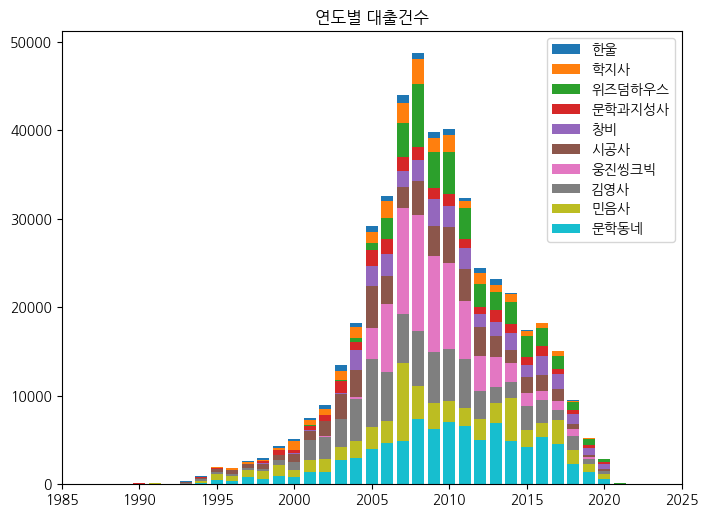

In [21]:
# 막대 그리기
# 인덱스 역순으로 그리면 된다.
fig,ax = plt.subplots(figsize=(8,6))

for i in reversed(range(len(ns_book12))):
  bar = ns_book12.iloc[i] # 행 추출
  label = ns_book12.index[i] # 출판사 이름 추출
  ax.bar(year_cols, bar, label = label)

ax.set_title('연도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
fig.show()

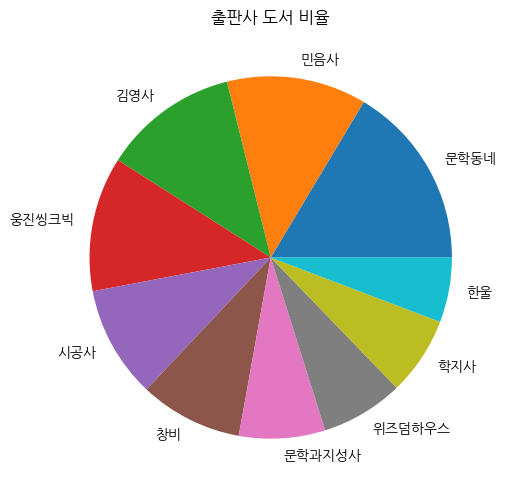

In [22]:
# 원 그래프 그리기(pie() 메서드 이용)
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

fig, ax = plt.subplots(figsize=(8,6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서 비율')
fig.show()

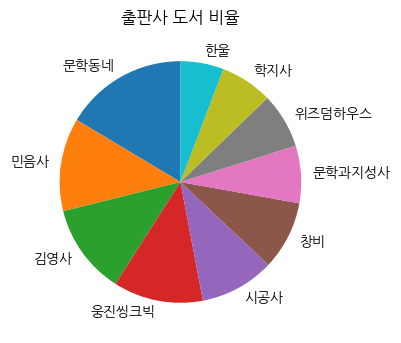

In [23]:
# 시작 각도 변경
plt.pie(data, labels=labels, startangle=90)
plt.title('출판사 도서 비율')
plt.show()

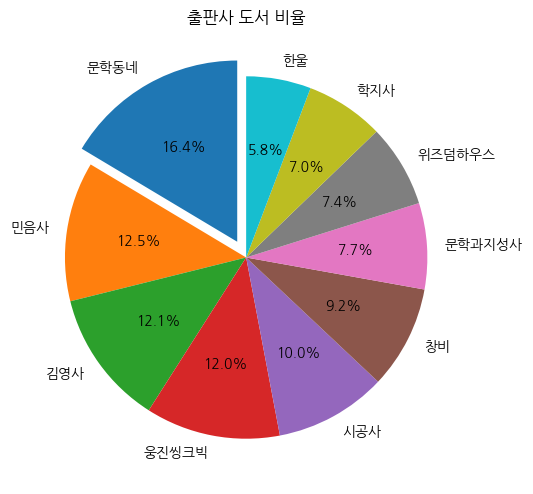

In [24]:
# 비율 표시하고 부채꼴 강조
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1] + [0]*9)
ax.set_title('출판사 도서 비율')
fig.show()

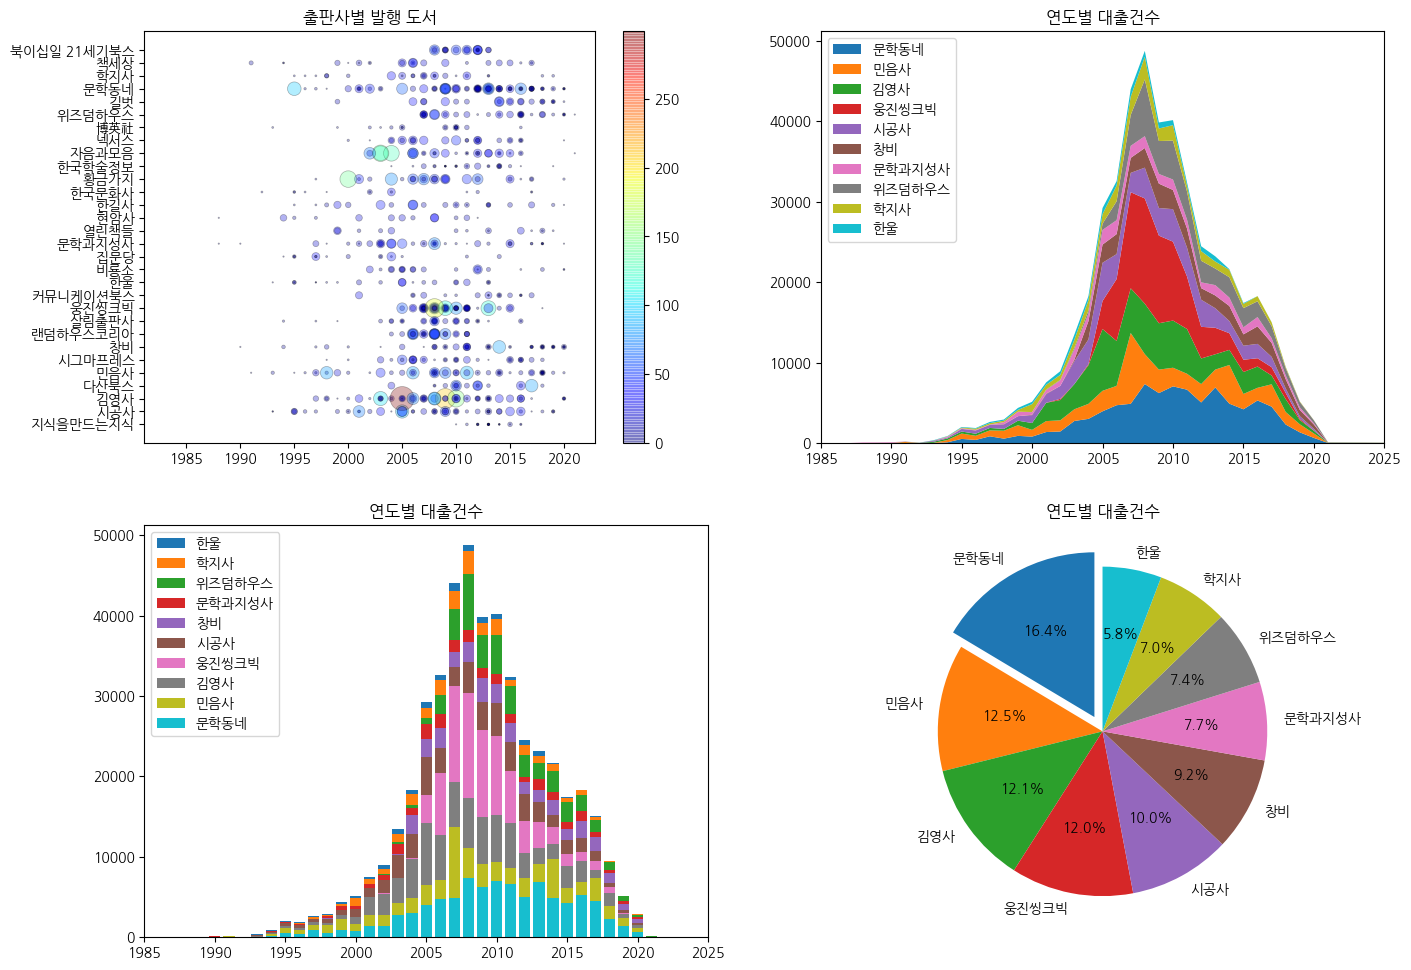

In [25]:
# 여러 종류 그래프가 있는 서브 플롯 그리기
fig, axs = plt.subplots(2,2, figsize=(16,12))

# 산점도
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axs[0,0].scatter(ns_book8['발행년도'], ns_book8['출판사'], linewidths=0.5, edgecolors='k', alpha=0.3, s=ns_book8['대출건수'], c=ns_book8['대출건수'], cmap='jet')
axs[0,0].set_title('출판사별 발행 도서')
fig.colorbar(sc, ax=axs[0,0])

# 스택 영역 그래프
axs[0,1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
axs[0,1].set_title('연도별 대출건수')
axs[0,1].legend(loc='upper left')
axs[0,1].set_xlim(1985, 2025)

# 스택 막대 그래프
for i in reversed(range(len(ns_book12))):
  bar = ns_book12.iloc[i]
  label = ns_book12.index[i]
  axs[1,0].bar(year_cols, bar, label=label)
axs[1,0].set_title('연도별 대출건수')
axs[1,0].legend(loc='upper left')
axs[1,0].set_xlim(1985, 2025)

# 원 그래프
axs[1,1].pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
axs[1,1].set_title('연도별 대출건수')
fig.savefig('all_in_one.png')
fig.show()